# Logistic regression 

In [127]:
import math,copy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


First we start by exploring our data set, then selecting we preform, if possible, some feature engineering.

In [45]:
data = pd.read_csv('data/framingham.csv').head(60)


In [93]:
x_train = np.array([data['age'], data["currentSmoker"], data['cigsPerDay'], data['sysBP'], data["BMI"]])
y_train = np.array(data['TenYearCHD'])

The following data set is for testing purposes. 

In [172]:
x_ex = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y_ex = np.array([0, 0, 0, 1, 1, 1])

We plot the intial data first to visualize the clusters clearly. The following plot showcases the distribution of y values in contrast to age.

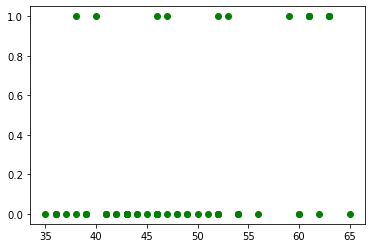

In [51]:
plt.plot(x_train[0],y_train[0],'go')

Initializing values for the coefficiants vector w and the value b.

In [121]:
w_init = np.zeros(x_train.shape[0])
b_init = -1

**Step 1** implementing the sigmoid function. where *z* is the linear model.

In [21]:
def sigmoid(z):
    return 1 / (1+np.exp(-z))

**Step 2** Implementing the function which computes the cost.
*Note that the logistic cost is different than the linear cost and requires calculating the Loss function L*.

In [122]:
def compute_cost(x_set,y_set,w_coef,b):
    m = x_set.shape[0]
    cost = 0
    for i in range(m):
        z = np.dot(w_coef,x_set[i]) + b
        fx_wb = sigmoid(z)
        loss = (np.log(fx_wb) * -y_set[i]) - ((1-y_set[i])*np.log(1-fx_wb))
        cost += loss
    return cost / m

Testing the function.

In [168]:
x_ex.shape

(6, 2)

In [167]:
compute_cost(x_ex, y_ex, w_init, b_init)

ValueError: shapes (5,) and (2,) not aligned: 5 (dim 0) != 2 (dim 0)

**Step 3** calculating the gradient *dj_db* & *dj_dw*.

In [123]:
def calculate_gradient(x_set,y_set,w_coef,b):
    m,n = x_set.shape
    dj_dw = np.zeros((n,))
    dj_db = 0.0
    for i in range(m):
        fx_wb = sigmoid(np.dot(x_set[i], w_coef) + b)
        square = fx_wb - y_set[i]
        for j in range(n):
            dj_dw[j] = dj_dw[j] + square * x_set[i,j]
        dj_db = dj_db + square
    return dj_dw/m, dj_db/m
            

In [125]:
dj,db = calculate_gradient(x_train.transpose(), y_train, w_init, b_init)
print(f"found dj_dw : {dj}")
print(f"found db_dw : {db}")

found dj_dw : [1.14826668 0.01458445 0.06056324 4.24995416 1.53795761]
found db_dw : 0.05227475470332852


**Step 4** Implementing gradient descent.

In [174]:
def logistic_gradient_descent(x_set,y_set,w_in,b_in,cost_fn,grad_fn,alpha,iterations):
    w = copy.deepcopy(w_in)
    b = b_in
    
    j_hist = []
    wb_hist = []
    for i in range(iterations):
        #find the gradient in every step of the loop
        dw,db = grad_fn(x_set,y_set,w,b)
        w = w - alpha * dw
        b = b - alpha * db
        
        #save the found cost with values w and b for plotting later 
        if i <100000:
            j_hist.append(cost_fn(x_set,y_set,w,b))
            wb_hist.append([w,b])
        if i % (math.ceil(iterations / 10)) == 0 :
            print(f"Cost at iteration {i} = {j_hist[-1]}")
    return w,b,j_hist,wb_hist

Testing gradient descent and the predicted values of the coefficiants.

In [175]:
alph = 0.1
iters = 10000
w_temp = np.zeros(x_ex.shape[1])
b_temp = 0


w_out,b_out,j_arr,wb_arr = logistic_gradient_descent(x_ex, y_ex, w_temp, b_temp,compute_cost,calculate_gradient, alph,iters)
print(f"Predicted value of w = {w_out} & b = {b_out}")

Cost at iteration 0 = 0.684610468560574
Cost at iteration 1000 = 0.1590977666870457
Cost at iteration 2000 = 0.08460064176930078
Cost at iteration 3000 = 0.05705327279402531
Cost at iteration 4000 = 0.04290759421682
Cost at iteration 5000 = 0.03433847729884557
Cost at iteration 6000 = 0.02860379802212006
Cost at iteration 7000 = 0.02450156960879306
Cost at iteration 8000 = 0.02142370332569295
Cost at iteration 9000 = 0.019030137124109114
Predicted value of w = [5.28123029 5.07815608] & b = -14.222409982019837


**Step 5** predecting Y value using the found **w** & **b** values.

In [179]:
sigmoid(np.dot(w_out[0],x_ex) + w_out[1])

array([[0.99955579, 0.99999774],
       [0.99996831, 0.99996831],
       [0.99999774, 0.99955579],
       [1.        , 0.99955579],
       [0.99999984, 0.99999984],
       [0.99996831, 0.99999999]])